In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 데이터 Read 및 Split(train, test)

In [2]:
df_en_s = pd.read_csv('[영어]라벨링_스케일링.csv',encoding='utf-8')
df_en_s

,Webtoon code,Title,Subscribers,Grade,Amount,Total Likes,SJ,GH,ML,KA,...,Thriller,Action,Comedy,Fantasy,romantic-fantasy,Horor,Sports,heartwarming,Comments Likes,Target
0,A2,Lore Olympus,0.079814,0.887417,0.501505,0.803013,0,0,0,1,...,0,0,0,1,0,0,0,0,4.457676,1
1,A35,Jungle Juice,0.085674,0.947020,0.561436,0.002078,0,1,0,0,...,0,1,0,1,0,0,0,0,0.919082,1
2,A37,Act Like You Love Me!,0.077990,0.927152,0.417363,0.002078,1,0,0,0,...,0,0,0,1,0,0,0,0,0.875933,1
3,A39,The Kiss Bet,0.176676,0.860927,0.232225,0.140618,0,0,1,0,...,0,0,0,0,0,0,0,0,0.793231,1
4,A40,My Gently Raised Beast,0.064348,0.973510,0.285228,0.000779,1,0,0,0,...,0,0,0,1,0,0,0,0,0.767148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,A136,Backchannel,0.023198,0.841060,0.293937,0.000270,0,1,0,0,...,0,1,0,0,0,0,0,0,-0.495009,4
207,A134,KILLMAX,0.086675,0.476821,0.262703,0.002078,0,1,0,0,...,0,1,0,0,0,0,0,0,-0.479485,4
208,A128,Yuna & Kawachan,0.029624,0.927152,0.399451,0.030218,0,0,1,0,...,0,0,0,0,0,0,0,0,-0.439418,4
209,A187,Dr. Frost,0.058085,0.933775,0.195373,0.047536,0,1,0,0,...,0,0,0,0,0,0,0,0,-0.717031,4


In [3]:
from sklearn.model_selection import train_test_split
header = []
for i in df_en_s:
    header.append(i)

    x = df_en_s[header[2:-1]]
    y = df_en_s[header[-1]]  #데이터셋 분류: x=input variable, y=output variable

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, shuffle=777, random_state=1)  #데이터셋 학습용/테스트용 나눔

# 다중분류
## 1. 로지스틱회귀 다중분류

In [4]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀
model = LogisticRegression() 

#분류 모델 학습 
model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test)) 
print('\n 테스트 정확도 :', model.score(X_test, y_test))  
logist = model.score(X_test, y_test)

for n in range(len(X_test.columns)):
    print(X_test.columns[n],'계수:', round(model.coef_[0][n],9) )

[분류 결과] 
 [1 2 4 2 1 2 1 3 2 2 4 1 4 4 4 4 4 4 1 1 2 1 4 2 1 3 2 4 1 2 3 2 4 1 2 2 3
 4 2 4 4 4 4 2 4 4 3 1 3 3 2 3 4]

 테스트 정확도 : 0.39622641509433965
Subscribers 계수: 0.47847582
Grade 계수: 0.24947247
Amount 계수: -0.391190494
Total Likes 계수: 0.434726607
SJ 계수: 0.136943439
GH 계수: -0.486279845
ML 계수: 0.293876642
KA 계수: 0.055774713
Sci-fi 계수: -0.484056152
Drama 계수: 0.146279363
Romance 계수: -0.035009664
Superhero 계수: -0.185618231
Supernatural 계수: 0.275525271
Slice of life 계수: 0.23043279
Thriller 계수: 0.043359987
Action 계수: 0.366991009
Comedy 계수: -0.415238859
Fantasy 계수: 0.278558959
romantic-fantasy 계수: 0.0
Horor 계수: 0.0
Sports 계수: 0.0
heartwarming 계수: 0.0
Comments Likes 계수: 1.247894735


## Confusion Matrix & Performances

[[10  3  0  1]
 [ 0  3  0  9]
 [ 0  4  3  4]
 [ 1  5  5  5]]


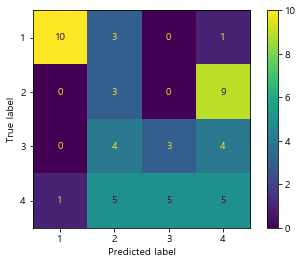

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_true = list(y_test)
y_pred = model.predict(X_test)
print(confusion_matrix(y_true, y_pred))
plot_confusion_matrix(model, X_test, y_test)  

## KNN 

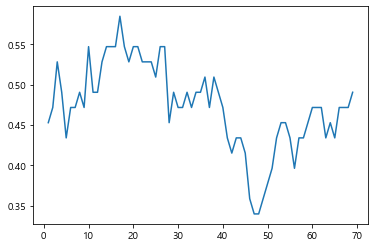

In [6]:
from sklearn.neighbors import KNeighborsClassifier

#model = KNeighborsClassifier(n_neighbors=4)
#model.fit(X_train, y_train)  
#print('[분류 결과] \n', model.predict(X_test)) 
k = 70
scores = []
for i in range(1,k):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #print('\n [테스트 정확도] :', score)  
    scores.append(score)
# print(model.predict_proba(X_test))
K = scores.index(max(scores))+1
plt.plot([i for i in range(1,k)], scores)

[분류 결과] 
 [1 2 3 2 1 2 1 4 4 3 2 1 2 3 3 3 3 4 1 1 2 1 3 4 1 3 2 3 1 3 3 2 2 1 2 2 3
 2 2 4 3 4 4 4 4 2 4 1 3 3 3 3 3]

 [테스트 정확도] : 0.5849056603773585
[[10  3  1  0]
 [ 0  6  4  2]
 [ 0  2  8  1]
 [ 1  3  5  7]]


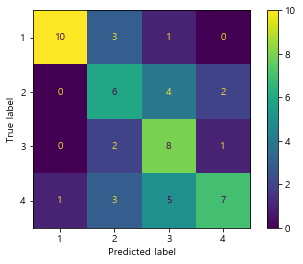

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

print('[분류 결과] \n', model.predict(X_test)) 
print('\n [테스트 정확도] :', model.score(X_test, y_test))  
knn = model.score(X_test, y_test)

y_true = list(y_test)
y_pred = model.predict(X_test)
print(confusion_matrix(y_true, y_pred))
plot_confusion_matrix(model, X_test, y_test)  

## RandomForest

[분류 결과] 
 [1 4 4 4 1 1 1 4 4 4 2 1 2 1 4 4 2 3 1 1 2 1 4 4 1 4 1 2 1 4 4 4 1 1 2 2 4
 4 2 4 4 4 4 4 2 4 4 1 4 4 4 4 4]

 [테스트 정확도] : 0.5471698113207547
[[12  2  0  0]
 [ 1  4  1  6]
 [ 0  2  0  9]
 [ 2  1  0 13]]


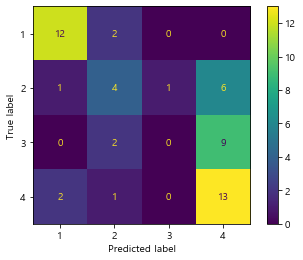

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

#print(model.predict_proba(X_test))
print('[분류 결과] \n', model.predict(X_test)) 
print('\n [테스트 정확도] :', model.score(X_test, y_test))  

RF = model.score(X_test, y_test)

y_true = list(y_test)
y_pred = model.predict(X_test)
print(confusion_matrix(y_true, y_pred))

plot_confusion_matrix(model, X_test, y_test)  


## SVM - SVC

[분류 결과] 
 [1 2 3 2 1 2 4 4 4 4 2 1 2 2 3 4 2 4 1 1 2 1 4 2 1 3 2 3 1 2 3 2 4 4 2 2 3
 2 2 4 4 4 4 4 4 3 4 4 3 4 4 4 4]

 테스트 정확도 : 0.5094339622641509
[[ 8  4  0  2]
 [ 0  6  3  3]
 [ 0  2  3  6]
 [ 0  4  2 10]]


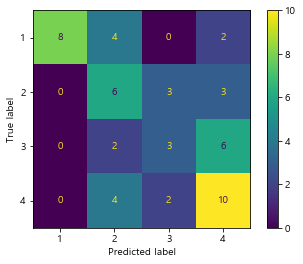

In [9]:
from sklearn.svm import SVC #Ridge
model = SVC(random_state=42)
 

#분류 모델 학습 
model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test)) 
print('\n 테스트 정확도 :', model.score(X_test, y_test))  
SVM= model.score(X_test, y_test)

y_true = list(y_test)
y_pred = model.predict(X_test)
print(confusion_matrix(y_true, y_pred))

plot_confusion_matrix(model, X_test, y_test)  


## DecisionTree

[분류 결과] 
 [4 2 2 3 1 2 1 3 4 4 2 1 2 2 3 3 2 4 1 1 2 1 2 3 1 3 2 2 1 3 3 3 1 1 3 2 1
 1 2 3 2 3 4 4 2 1 4 4 3 3 3 3 2]

 테스트 정확도 : 0.4716981132075472
[[9 3 1 1]
 [2 7 2 1]
 [0 4 5 2]
 [2 2 8 4]]


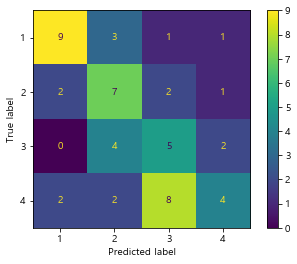

In [10]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test))
print('\n 테스트 정확도 :', model.score(X_test, y_test))  
DT =model.score(X_test, y_test)

y_true = list(y_test)
y_pred = model.predict(X_test)
print(confusion_matrix(y_true, y_pred))

plot_confusion_matrix(model, X_test, y_test)  


[Text(629.0660377358491, 1302.375, 'X[22] <= -0.273\ngini = 0.743\nsamples = 158\nvalue = [33, 39, 36, 50]\nclass = 4등급'),
 Text(400.07547169811323, 1189.125, 'X[22] <= -0.564\ngini = 0.651\nsamples = 92\nvalue = [1, 19, 35, 37]\nclass = 4등급'),
 Text(294.7924528301887, 1075.875, 'X[3] <= 0.063\ngini = 0.544\nsamples = 54\nvalue = [1, 2, 22, 29]\nclass = 4등급'),
 Text(189.50943396226415, 962.625, 'X[3] <= 0.025\ngini = 0.52\nsamples = 44\nvalue = [1, 2, 14, 27]\nclass = 4등급'),
 Text(105.28301886792454, 849.375, 'X[22] <= -0.777\ngini = 0.573\nsamples = 25\nvalue = [1, 1, 11, 12]\nclass = 4등급'),
 Text(63.16981132075472, 736.125, 'X[2] <= 0.268\ngini = 0.355\nsamples = 13\nvalue = [0, 0, 3, 10]\nclass = 4등급'),
 Text(42.113207547169814, 622.875, 'X[8] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 3, 2]\nclass = 3등급'),
 Text(21.056603773584907, 509.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]\nclass = 3등급'),
 Text(63.16981132075472, 509.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 0,

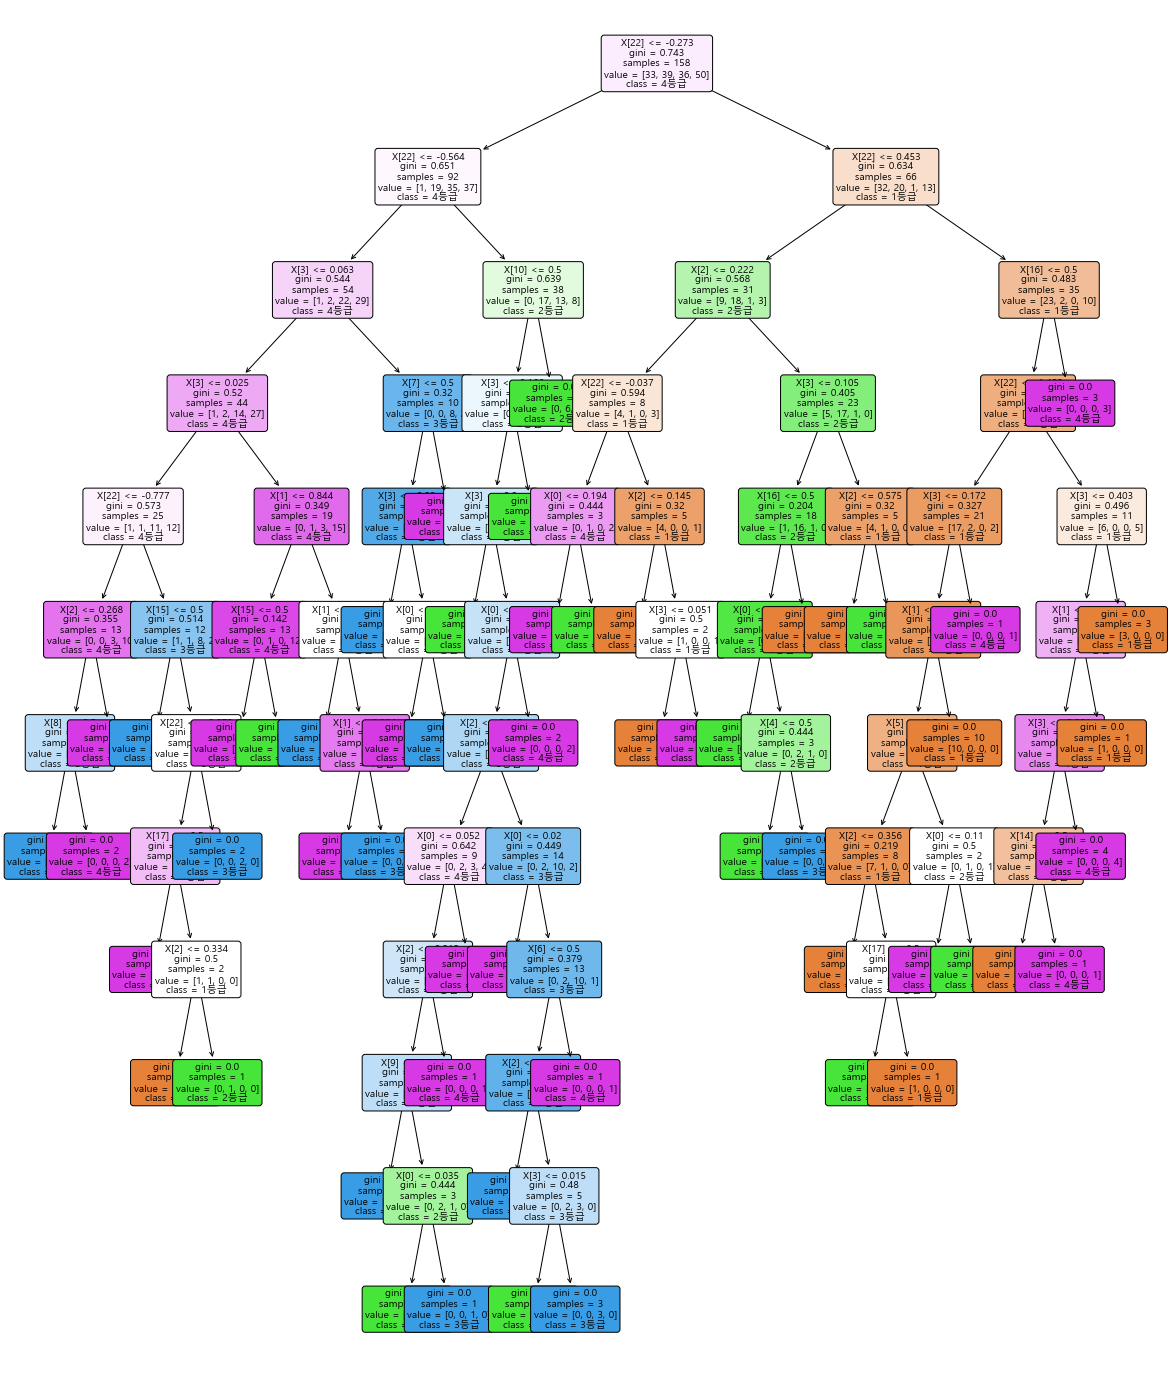

In [11]:
plt.figure(figsize=(20, 25))
tree.plot_tree(model,
               class_names=['1등급','2등급','3등급','4등급'],
               filled=True,
               rounded=True,
               fontsize=10)

[[9 3 1 1]
 [2 7 2 1]
 [0 4 5 2]
 [2 2 8 4]]


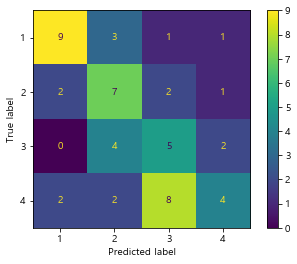

In [12]:
y_true = list(y_test)
y_pred = model.predict(X_test)
print(confusion_matrix(y_true, y_pred))

plot_confusion_matrix(model, X_test, y_test)  


## Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)  
print('[분류 결과] \n',model.predict(X_test))
print('\n 테스트 정확도 :', model.score(X_test, y_test))  
GNB = model.score(X_test, y_test)

[분류 결과] 
 [1 1 1 1 1 1 4 1 2 2 1 1 1 1 1 4 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 1 1 1 4 1 2 1 1 1 1 1 1 2 1 1]

 테스트 정확도 : 0.2830188679245283


[[12  1  0  1]
 [11  1  0  0]
 [ 8  3  0  0]
 [11  3  0  2]]


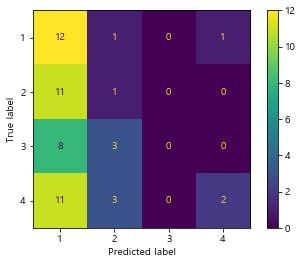

In [14]:
y_true = list(y_test)
y_pred = model.predict(X_test)
print(confusion_matrix(y_true, y_pred))

plot_confusion_matrix(model, X_test, y_test)  


# Models Evaluation 
## 각 모델별 분류 정확도 비교 시각화

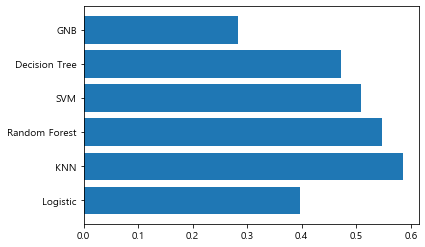

,Accuracy
Logistic,0.396226
KNN,0.584906
Random Forest,0.547170
SVM,0.509434
Decision Tree,0.471698
GNB,0.283019


In [15]:
model_score=[logist,knn,RF, SVM,DT,GNB]
models= ['Logistic','KNN','Random Forest','SVM','Decision Tree','GNB']

plt.barh(models,model_score)
plt.show()
pd.DataFrame(model_score,index= models ,columns=['Accuracy'])